Numerical input variables may have a highly skewed or non-standard distribution.

This could be caused by outliers in the data, multi-modal distributions, highly exponential distributions, and more.

Many machine learning algorithms prefer or perform better when numerical input variables and even output variables in the case of regression have a standard probability distribution, such as a Gaussian (normal) or a uniform distribution.

The quantile transform provides an automatic way to transform a numeric input variable to have a different data distribution, which in turn, can be used as input to a predictive model.



*   Many machine learning algorithms prefer or perform better when numerical variables have a Gaussian or standard probability distribution.
*   Quantile transforms are a technique for transforming numerical input or output variables to have a Gaussian or uniform probability distribution.
*   How to use the QuantileTransformer to change the probability distribution of numeric variables to improve the performance of predictive models.


This quantile transform is available in the scikit-learn Python machine learning library via the QuantileTransformer class.

The class has an “output_distribution” argument that can be set to “uniform” or “normal” and defaults to “uniform“.

It also provides a “n_quantiles” that determines the resolution of the mapping or ranking of the observations in the dataset. This must be set to a value less than the number of observations in the dataset and defaults to 1,000.

#EX:
We can generate a sample of random Gaussian numbers and impose a skew on the distribution by calculating the exponent. The QuantileTransformer can then be used to transform the dataset to be another distribution, in this cases back to a Gaussian distribution.






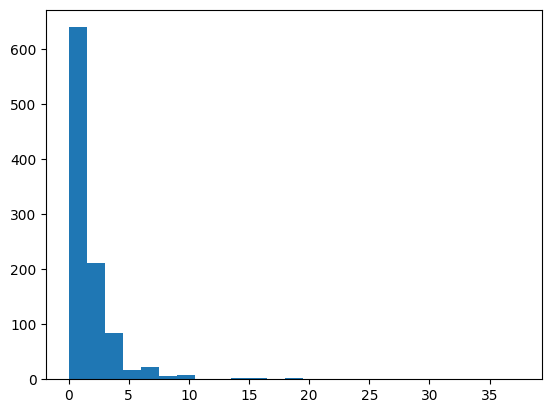

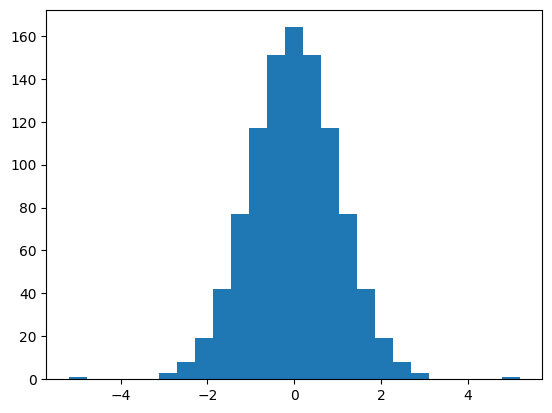

In [ ]:
# demonstration of the quantile transform
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot
# generate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = exp(data)
# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# quantile transform the raw data
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(data)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

##Then a QuantileTransformer is used to map the data distribution Gaussian and standardize the result, centering the values on the mean value of 0 and a standard deviation of 1.0.

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      51      52      53      54   

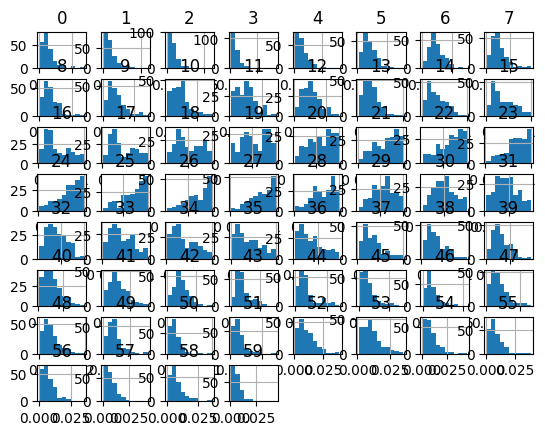

In [ ]:
# load and summarize the sonar dataset
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
print(dataset)
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())
# histograms of the variables
dataset.hist()
pyplot.show()

Next, let’s fit and evaluate a machine learning model on the raw dataset.

We will use a k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated stratified k-fold cross-validation.

In [ ]:
# evaluate knn on the raw sonar dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str')) #<-------
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


###We can see that the model achieved a mean classification accuracy of about 79.7 percent, showing that it has skill (better than 53.4 percent) and is in the ball-park of good performance (88 percent).

#Normal Quantile Transform
It is often desirable to transform an input variable to have a normal probability distribution to improve the modeling performance.

We can apply the Quantile transform using the QuantileTransformer class and set the “output_distribution” argument to “normal“. We must also set the “n_quantiles” argument to a value less than the number of observations in the training dataset, in this case, 100.

Once defined, we can call the fit_transform() function and pass it to our dataset to create a quantile transformed version of our dataset.

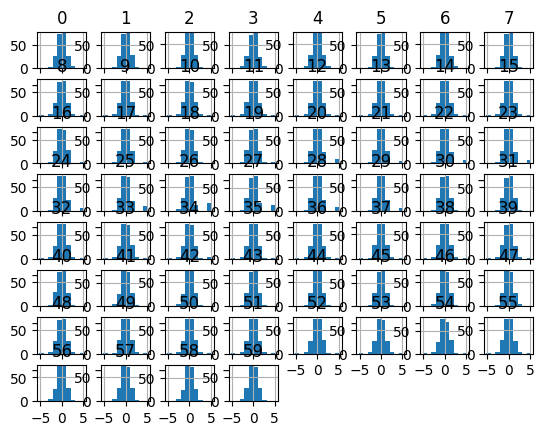

In [ ]:
# visualize a normal quantile transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a normal quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
dataset.hist()
pyplot.show()

In [ ]:
# evaluate knn on the sonar dataset with normal quantile transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.817 (0.087)


we can see that the normal quantile transform results in a lift in performance from 79.7% accuracy without the transform to about 81.7% with the transform.

#Uniform Quantile Transform
Sometimes it can be beneficial to transform a highly exponential or multi-modal distribution to have a uniform distribution.

This is especially useful for data with a large and sparse range of values, e.g. outliers that are common rather than rare.

We can apply the transform by defining a QuantileTransformer class and setting the “output_distribution” argument to “uniform” (the default).

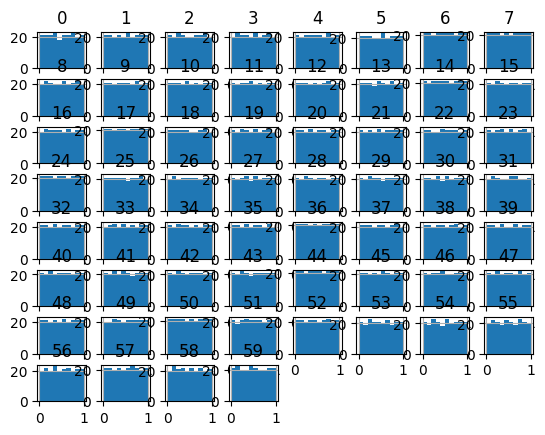

In [ ]:
# visualize a uniform quantile transform of the sonar dataset
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a uniform quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
dataset.hist()
pyplot.show()

In [ ]:
# evaluate knn on the sonar dataset with uniform quantile transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.845 (0.074)


we can see that the uniform transform results in a lift in performance from 79.7 percent accuracy without the transform to about 84.5 percent with the transform, better than the normal transform that achieved a score of 81.7 percent.

This hyperparameter can be tuned to explore the effect of the resolution of the transform on the resulting skill of the model.

The example below performs this experiment and plots the mean accuracy for different “n_quantiles” values from 1 to 99.

>1 0.466 (0.016)
>2 0.813 (0.085)
>3 0.840 (0.080)
>4 0.854 (0.075)
>5 0.848 (0.072)
>6 0.851 (0.071)
>7 0.845 (0.071)
>8 0.848 (0.066)
>9 0.848 (0.071)
>10 0.843 (0.074)
>11 0.838 (0.069)
>12 0.838 (0.069)
>13 0.846 (0.071)
>14 0.842 (0.071)
>15 0.845 (0.068)
>16 0.841 (0.074)
>17 0.846 (0.071)
>18 0.842 (0.075)
>19 0.840 (0.075)
>20 0.838 (0.076)
>21 0.843 (0.071)
>22 0.845 (0.073)
>23 0.843 (0.068)
>24 0.845 (0.072)
>25 0.840 (0.077)
>26 0.843 (0.072)
>27 0.842 (0.073)
>28 0.840 (0.076)
>29 0.845 (0.072)
>30 0.840 (0.075)
>31 0.838 (0.076)
>32 0.842 (0.075)
>33 0.843 (0.074)
>34 0.843 (0.075)
>35 0.842 (0.075)
>36 0.843 (0.073)
>37 0.842 (0.075)
>38 0.843 (0.075)
>39 0.840 (0.076)
>40 0.845 (0.074)
>41 0.841 (0.072)
>42 0.842 (0.075)
>43 0.842 (0.074)
>44 0.843 (0.074)
>45 0.840 (0.076)
>46 0.842 (0.075)
>47 0.845 (0.072)
>48 0.842 (0.073)
>49 0.840 (0.073)
>50 0.842 (0.072)
>51 0.842 (0.075)
>52 0.845 (0.071)
>53 0.843 (0.075)
>54 0.845 (0.074)
>55 0.838 (0.076)
>56 0.846 (0.073)
>

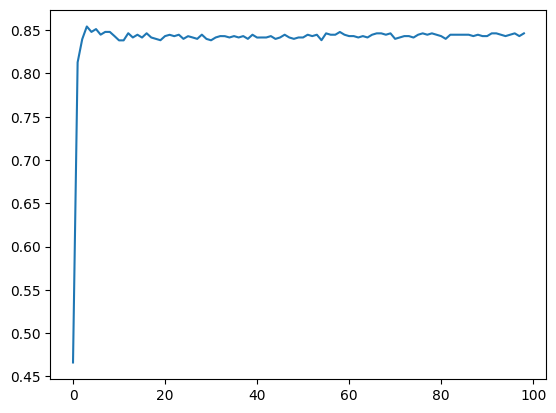

In [ ]:
# explore number of quantiles on classification accuracy
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
	# load dataset
	url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
	dataset = read_csv(url, header=None)
	data = dataset.values
	# separate into input and output columns
	X, y = data[:, :-1], data[:, -1]
	# ensure inputs are floats and output is an integer label
	X = X.astype('float32')
	y = LabelEncoder().fit_transform(y.astype('str'))
	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,100):
		# define the pipeline
		trans = QuantileTransformer(n_quantiles=i, output_distribution='uniform')
		model = KNeighborsClassifier()
		models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results = list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(mean(scores))
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.plot(results)
pyplot.show()

We can see that surprisingly smaller values resulted in better accuracy, with values such as 4 achieving an accuracy of about 85.4 percent.